# Port of columnsfmri to python including jupyter demo

Import model implementation from columnsfmri.py and other useful modules.

In [26]:
%matplotlib inline
import columnsfmri
import numpy as np
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Inititialize simulation using a 512 x 512 grid on an area of 24 x 24 mm. 

In [2]:
N = 512; L = 24
s = columnsfmri.sim(N,L)

Simulate a column pattern by filtering Gaussian white noise. Rho is the main pattern frequency, delta specifies the amount of irregularity.

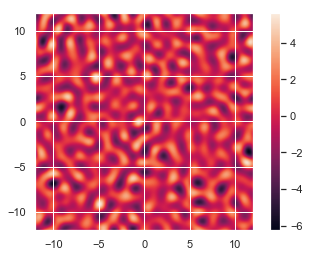

In [12]:
gwn = s.gwnoise()
rho,deltaRelative = 0.5,0.5
columnPattern = s.columnPattern(rho,deltaRelative,gwn)
s.plotPattern(columnPattern)

Simulate a spatial BOLD response with a FWHM of 2 mm, and an average response amplitude of 5%.

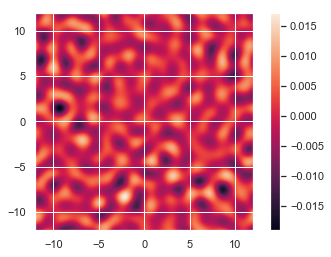

In [13]:
fwhm = 2
beta = 0.05
boldPattern,_,_ = s.bold(fwhm,beta,columnPattern)
s.plotPattern(boldPattern)

Simulate MRI sampling using a voxel width of 3 mm. (We first add the relative response pattern to a constant background of 1).

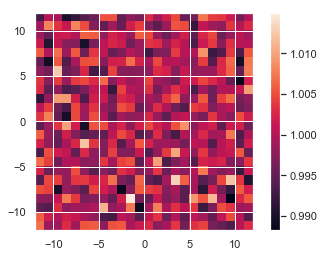

In [21]:
w = 1
mriPattern = s.mri(w,1+boldPattern)
s.plotVoxels(mriPattern)

The amount of functional contrast can be quantified as the standard deviation of the imaged responses (contrast range).

In [22]:
c = np.std(mriPattern)
print(str(100*c)+"%")

0.4408740500653163%


In [24]:
V = 1
noiseType = 'Physiological'
TR = 2
nT = 50
differentialFlag = True
columnsfmri.noiseModel(V,TR,nT,differentialFlag,noiseType=noiseType)

0.010449498895213887

In [25]:
w = np.linspace(0.1,3,100)
V = w**3
TR = 2
nT = 100
differentialFlag = True
noiseType = '3T'
SNR = 1/columnsfmri.noiseModel(V,TR,nT,differentialFlag,noiseType=noiseType)

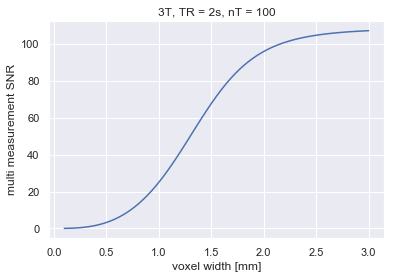

In [30]:
plt.plot(w,SNR)
plt.xlabel('voxel width [mm]')
plt.ylabel('multi measurement SNR')
plt.title('3T, TR = 2s, nT = 100')
plt.show()

In [43]:
importlib.reload(columnsfmri)
cnr = 1
N = 10
columnsfmri.detectionProbability(cnr,N)

0.5175987740899441